In [1]:
from astropy.table import Table
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def open_fits(filename: str):
    """"
    Open fits file and load it as a pandas dataframe

    :param filename: location of the fits file

    :returns: data, pandas dataframe
    """
    dat = Table.read(filename, format='fits')
    data = dat.to_pandas()
    return data

In [4]:
# Creating file paths
folder_path = "../../Data/Fangyou_data/Cleaned/"
files = os.listdir(folder_path)
file_paths = [folder_path + file for file in files]

In [7]:
data = []
for file in file_paths:
    dat = pd.read_csv(file)
    print(file, " has ", len(dat), " rows.")
    data.append(dat)

../../Data/Fangyou_data/Cleaned/Bootes_clean.csv  has  17729  rows.
../../Data/Fangyou_data/Cleaned/Elais-N1_clean.csv  has  30248  rows.
../../Data/Fangyou_data/Cleaned/Lockman_clean.csv  has  29632  rows.


In [8]:
# Finding unique columns across the 3 datasets
all_columns = [list(data[0].columns), list(data[1].columns), list(data[2].columns)]
all_columns = [item for sublist in all_columns for item in sublist]
unique_columns, indexes = np.unique(all_columns, return_index=True)
unique_columns = [all_columns[index] for index in sorted(indexes)]

# Column for filling in all the data about which columns are in which datasets
binary_columns = np.zeros((3,len(unique_columns)))

for i, dat in enumerate(data):
    current_columns = list(dat.columns)
    for j, has_column in enumerate(unique_columns):
        if has_column in current_columns:
            binary_columns[i,j]=1

In [9]:
# Dataframe containing which columns are in which dataset
has_column_dataframe = pd.DataFrame(binary_columns.T, index=unique_columns, columns=["Bootes", "Elais-N1", "Lockman Hole"])

In [10]:
has_column_dataframe['Sum'] = has_column_dataframe.sum(axis=1)

In [11]:
with pd.option_context('display.max_rows', 500):
    display(has_column_dataframe)

,Bootes,Elais-N1,Lockman Hole,Sum
Source_Name,1.0,1.0,1.0,3.0
FLAG_DEEP,1.0,0.0,0.0,1.0
FLAG_OVERLAP,1.0,1.0,1.0,3.0
Z_BEST,1.0,1.0,1.0,3.0
z1_median,1.0,1.0,1.0,3.0
XID+_rerun_mips,1.0,1.0,1.0,3.0
XID+_rerun_pacs,1.0,1.0,1.0,3.0
XID+_rerun_SPIRE,1.0,1.0,1.0,3.0
CHANGE_FLAG_ID,1.0,1.0,1.0,3.0
CHANGE_FLAG_ZBEST,1.0,1.0,1.0,3.0


<AxesSubplot:>

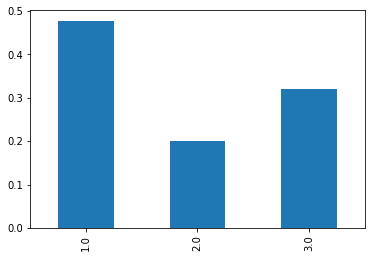

In [12]:
column_frequencies = has_column_dataframe['Sum'].value_counts()
column_frequencies = column_frequencies/sum(column_frequencies)
column_frequencies = column_frequencies.sort_index(axis=0)
column_frequencies.plot(kind='bar')

In [13]:
column_frequencies

1.0    0.477612
2.0    0.201493
3.0    0.320896
Name: Sum, dtype: float64

In [44]:
print("Bootes NaN's per column:\n")

Bootes_nan_columns = pd.DataFrame()
classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']
for classification in classes:
    dat = data[0]
    Bootes_nan_columns[classification] = dat[dat["Classification"] == classification].isna().sum()
    # Normalising
    Bootes_nan_columns[classification] = Bootes_nan_columns[classification]/len(dat[dat["Classification"] == classification])

Bootes_nan_columns = Bootes_nan_columns.sort_values(by=["star-forming galaxy"], ascending=False)
with pd.option_context('display.max_rows', 500):
    display(Bootes_nan_columns)

Bootes NaN's per column:



,jet-mode radio AGN/low-excitation radio galaxy,quasar-like radio AGN / high-excitation radio galaxy,radio-quiet AGN,star-forming galaxy
K_e,0.452004,0.427110,0.427597,0.401703
K_f,0.452004,0.427110,0.427597,0.401703
K_e_raw,0.448897,0.419437,0.425498,0.397445
z_e,0.249146,0.225064,0.261280,0.230492
z_f,0.249146,0.225064,0.261280,0.230492
z_e_raw,0.239205,0.212276,0.251836,0.217064
z_Subaru_f,0.108419,0.117647,0.126443,0.093507
z_Subaru_e,0.108419,0.117647,0.126443,0.093507
y_f,0.097856,0.086957,0.102308,0.079915
y_e,0.097856,0.086957,0.102308,0.079915


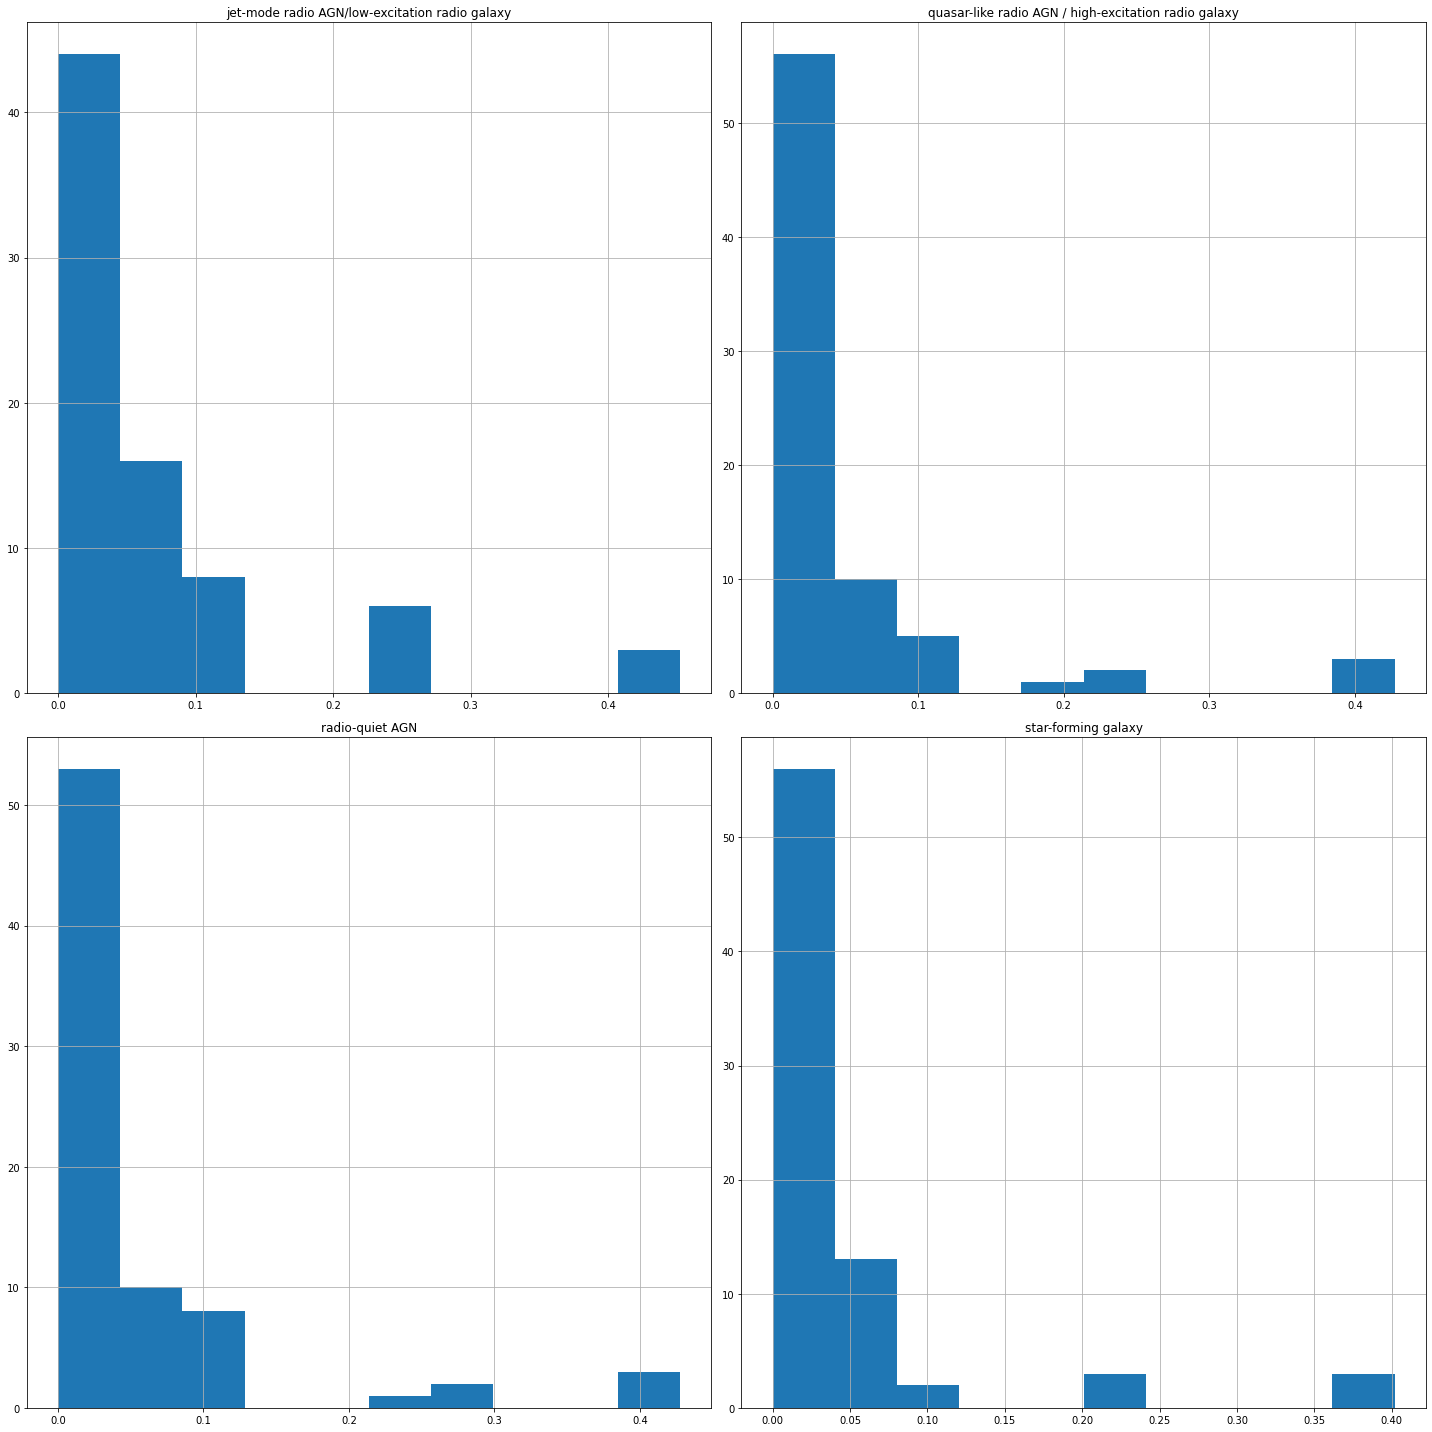

In [42]:
Bootes_nan_columns.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

In [36]:
print(data[0].isna().sum().to_string())

Source_Name             0
FLAG_DEEP               0
FLAG_OVERLAP            0
Z_BEST                  0
z1_median               6
XID+_rerun_mips         0
XID+_rerun_pacs         0
XID+_rerun_SPIRE        0
CHANGE_FLAG_ID          0
CHANGE_FLAG_ZBEST       0
CHANGE_FLAG_DEEP        0
CHANGE_FLAG_FIR         0
FLAG_GOOD               0
u_f                  1496
u_e                  1496
u_e_raw              1496
Bw_f                  436
Bw_e                  436
Bw_e_raw              429
R_f                   319
R_e                   319
R_e_raw               305
I_f                    63
I_e                    63
I_e_raw                50
z_f                  4203
z_e                  4203
z_e_raw              3984
z_Subaru_f           1778
z_Subaru_e           1778
z_Subaru_e_raw       1314
y_f                  1520
y_e                  1520
y_e_raw              1455
J_f                   409
J_e                   409
J_e_raw               398
H_f                   340
H_e         

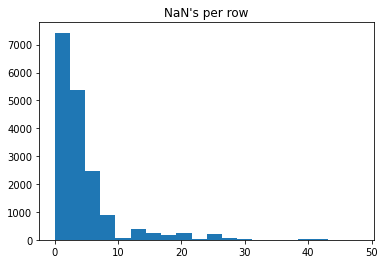

In [29]:
plt.hist(data[0].isna().sum(axis=1).values, bins=20)
plt.title("NaN's per row")
plt.show()

In [15]:
print("EN1 NaN's per column:\n")

print(data[1].isna().sum().to_string())

EN1 NaN's per column:

Source_Name              0
FLAG_OVERLAP             0
Z_BEST                   0
z1_median               10
XID+_rerun_mips          0
XID+_rerun_pacs          0
XID+_rerun_SPIRE         0
CHANGE_FLAG_ID           0
CHANGE_FLAG_ZBEST        0
CHANGE_FLAG_DEEP         0
CHANGE_FLAG_FIR          0
FLAG_GOOD                0
u_f                      0
u_e                      0
u_e_raw                  0
g_f                     35
g_e                     35
g_e_raw                 18
r_f                     40
r_e                     40
r_e_raw                 35
i_f                      2
i_e                      2
i_e_raw                  2
z_f                     12
z_e                     12
z_e_raw                  9
y_f                      8
y_e                      8
y_e_raw                  4
g_hsc_f               1591
g_hsc_e               1591
g_hsc_e_raw           1589
r_hsc_f               1601
r_hsc_e               1601
r_hsc_e_raw           1588
i_hsc

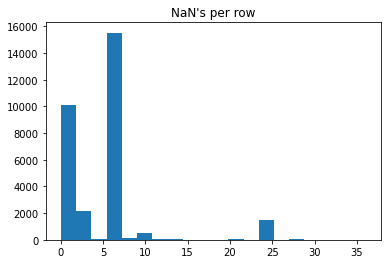

In [30]:
plt.hist(data[1].isna().sum(axis=1).values, bins=20)
plt.title("NaN's per row")
plt.show()

In [16]:
print("Lockman Hole NaN's per column:\n")

print(data[2].isna().sum().to_string())

Lockman Hole NaN's per column:

Source_Name              0
FLAG_OVERLAP             0
Z_BEST                   0
z1_median                0
XID+_rerun_mips          0
XID+_rerun_pacs          0
XID+_rerun_SPIRE         0
CHANGE_FLAG_ID           0
CHANGE_FLAG_ZBEST        0
CHANGE_FLAG_DEEP         0
CHANGE_FLAG_FIR          0
FLAG_GOOD                0
u_f                    274
u_e                    274
u_e_raw                274
g_f                     21
g_e                     21
g_e_raw                 21
r_f                     62
r_e                     62
r_e_raw                  1
z_f                    913
z_e                    913
z_e_raw                876
g_rcs_f               2912
g_rcs_e               2912
g_rcs_e_raw           2453
r_rcs_f               3010
r_rcs_e               3010
r_rcs_e_raw           2459
i_rcs_f               2762
i_rcs_e               2762
i_rcs_e_raw           2470
z_rcs_f               2871
z_rcs_e               2871
z_rcs_e_raw           2

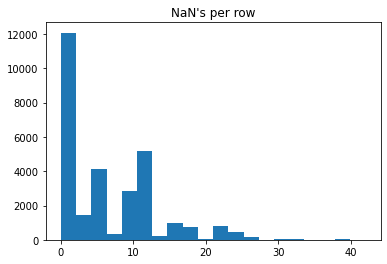

In [31]:
plt.hist(data[2].isna().sum(axis=1).values, bins=20)
plt.title("NaN's per row")
plt.show()

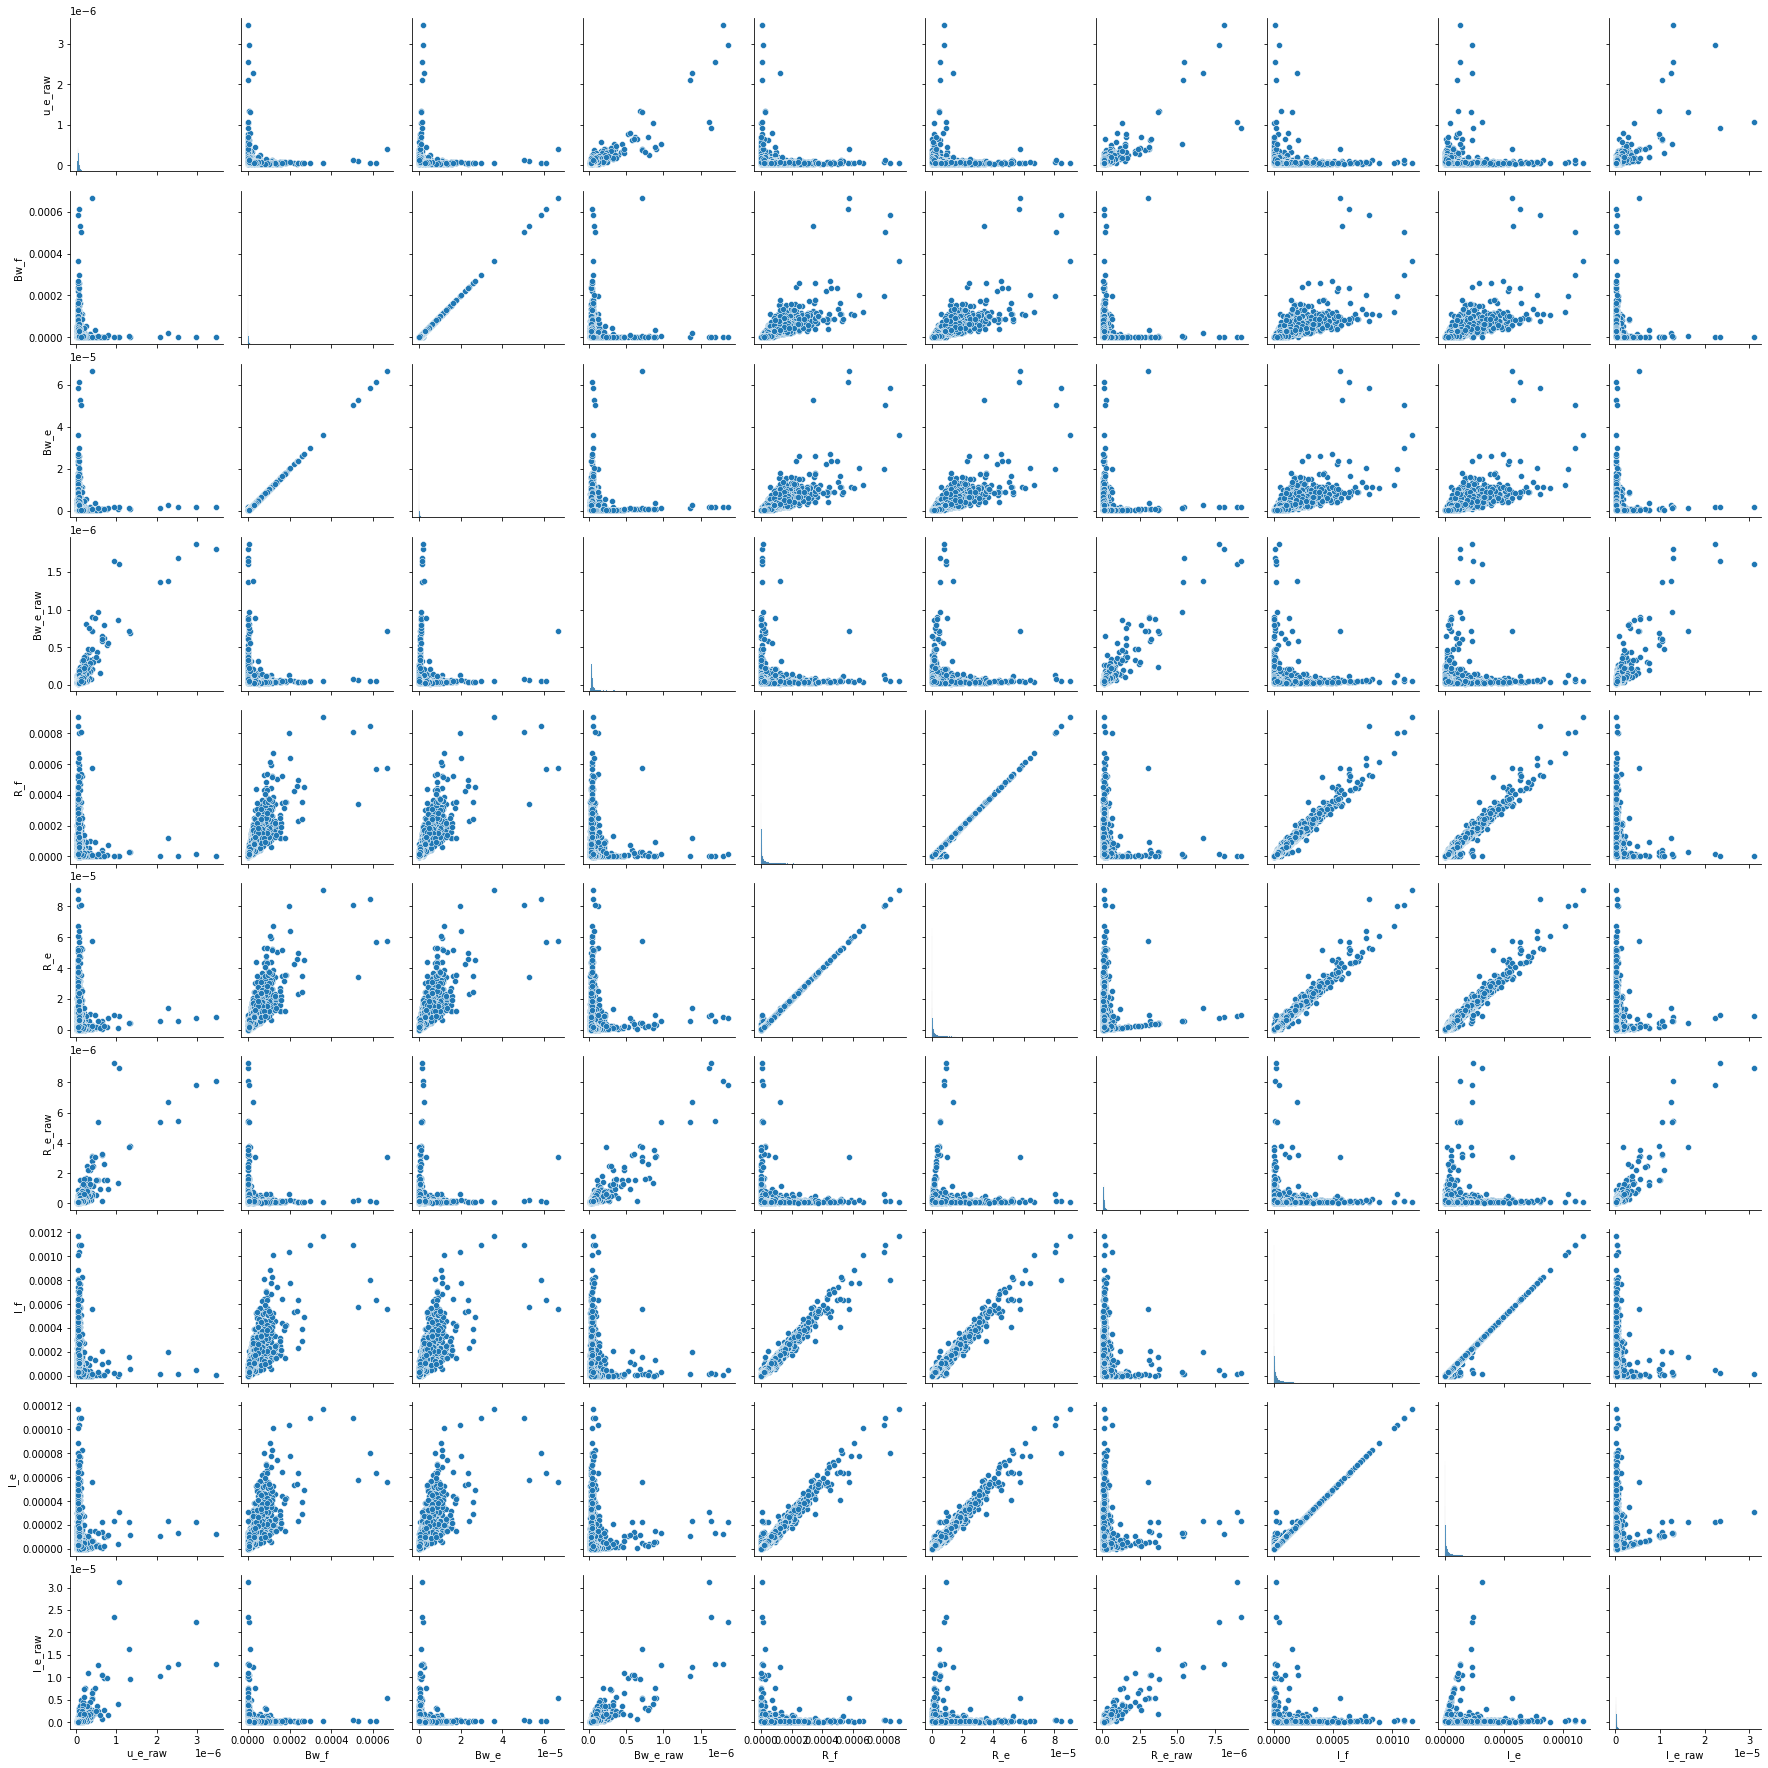

In [17]:
sns.pairplot(data[0].iloc[:, 15:25])
plt.show()
#fig = swarm_plot.get_figure()
#fig.savefig("./Output/Bootes_pairplot.pdf")

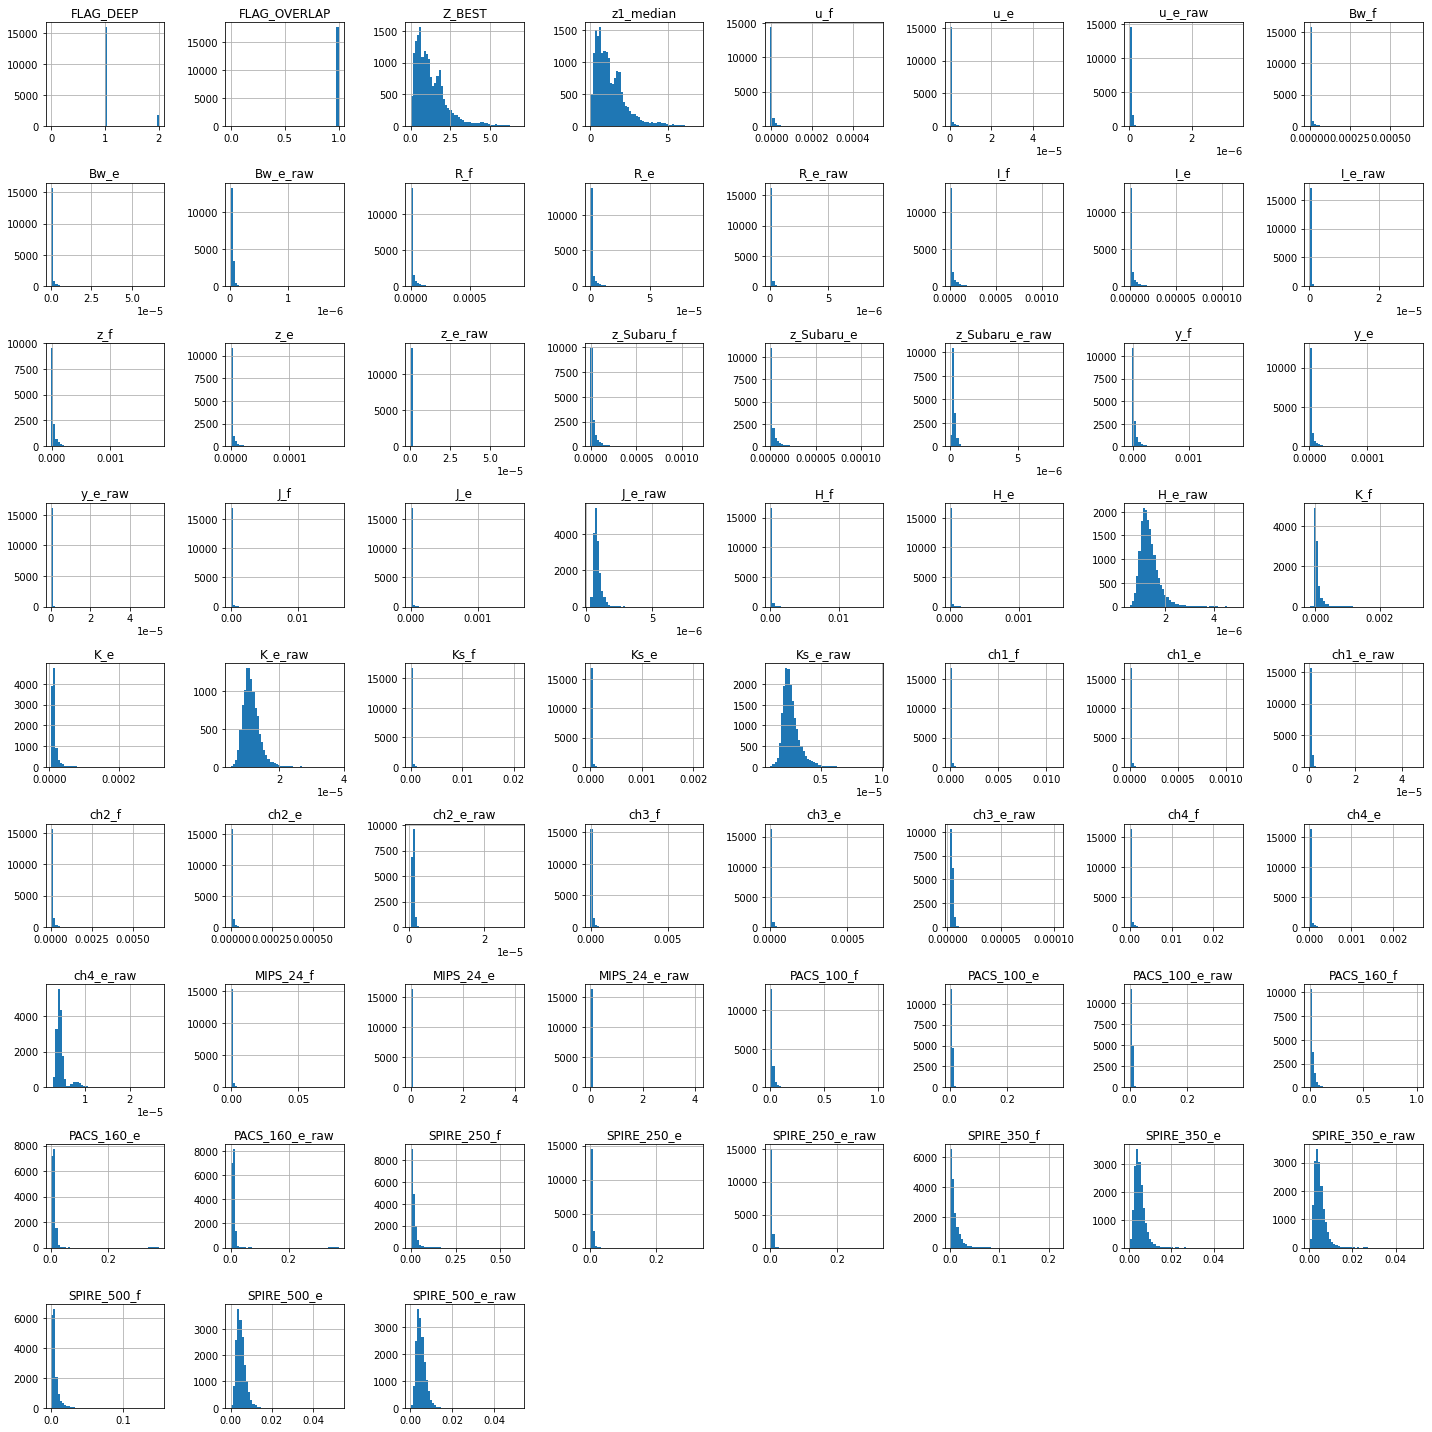

In [18]:
data[0].hist(figsize = (20,20), bins=50)
plt.tight_layout()
plt.savefig("./Output/histograms_Bootes.pdf")

In [19]:
indices = [4, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75]
corr = data[0].iloc[:,indices].corr()

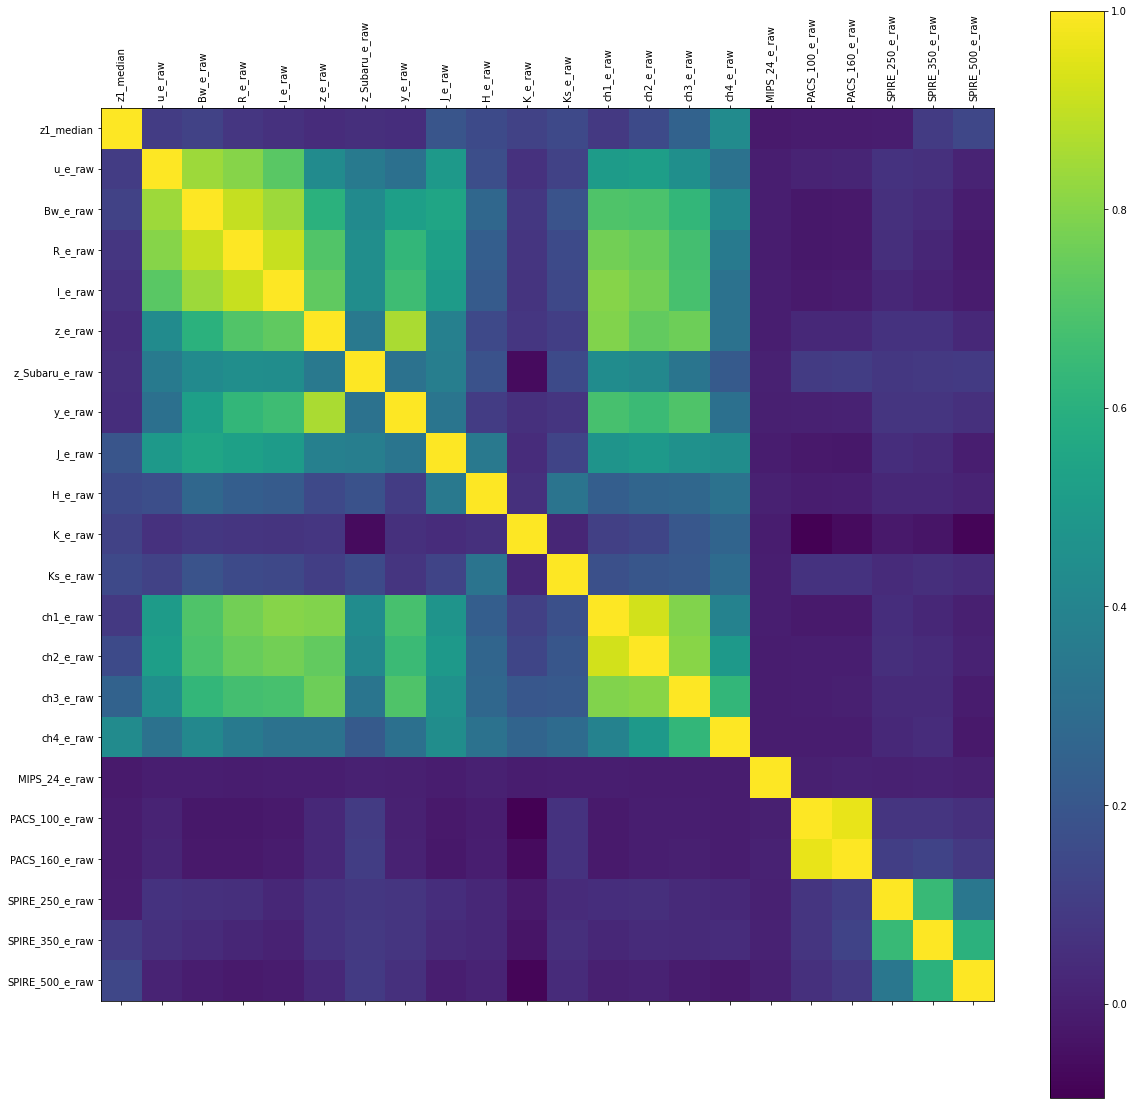

In [20]:
fig = plt.figure(figsize=(20,20))
frame = fig.add_subplot(1,1,1)

plot = frame.matshow(corr)
fig.colorbar(plot)

frame.set_xticks(range(corr.shape[1]), corr.columns, rotation=90)
frame.set_yticks(range(corr.shape[1]), corr.columns)
plt.show()

In [21]:
data[0].columns

Index(['Source_Name', 'FLAG_DEEP', 'FLAG_OVERLAP', 'Z_BEST', 'z1_median',
       'XID+_rerun_mips', 'XID+_rerun_pacs', 'XID+_rerun_SPIRE',
       'CHANGE_FLAG_ID', 'CHANGE_FLAG_ZBEST', 'CHANGE_FLAG_DEEP',
       'CHANGE_FLAG_FIR', 'FLAG_GOOD', 'u_f', 'u_e', 'u_e_raw', 'Bw_f', 'Bw_e',
       'Bw_e_raw', 'R_f', 'R_e', 'R_e_raw', 'I_f', 'I_e', 'I_e_raw', 'z_f',
       'z_e', 'z_e_raw', 'z_Subaru_f', 'z_Subaru_e', 'z_Subaru_e_raw', 'y_f',
       'y_e', 'y_e_raw', 'J_f', 'J_e', 'J_e_raw', 'H_f', 'H_e', 'H_e_raw',
       'K_f', 'K_e', 'K_e_raw', 'Ks_f', 'Ks_e', 'Ks_e_raw', 'ch1_f', 'ch1_e',
       'ch1_e_raw', 'ch2_f', 'ch2_e', 'ch2_e_raw', 'ch3_f', 'ch3_e',
       'ch3_e_raw', 'ch4_f', 'ch4_e', 'ch4_e_raw', 'MIPS_24_f', 'MIPS_24_e',
       'MIPS_24_e_raw', 'PACS_100_f', 'PACS_100_e', 'PACS_100_e_raw',
       'PACS_160_f', 'PACS_160_e', 'PACS_160_e_raw', 'SPIRE_250_f',
       'SPIRE_250_e', 'SPIRE_250_e_raw', 'SPIRE_350_f', 'SPIRE_350_e',
       'SPIRE_350_e_raw', 'SPIRE_500_f', 'SPIRE_500_e